In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random
import train
import json

Loading existing model
Loading existing model
Loading existing model
Loading existing model
Loading existing model


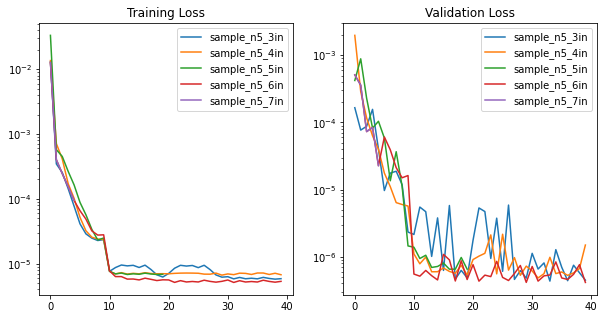

In [25]:
model_ids=[
            #'sample_n5_1in',
            #'sample_n5_2in',
            'sample_n5_3in',
            'sample_n5_4in',
            'sample_n5_5in',
            'sample_n5_6in',
            'sample_n5_7in',
          ]

# fig,ax = plt.subplots(1,1,figsize=(5,5))
# ax.plot(tl[0:], label='Train')
# ax.plot(vl[0:], label='Validation')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")
    
for model_id in model_ids:
    with open(f'data/{model_id}.cfg') as f:
        configurations = json.load(f)

    model, mean_losses = train.load_model_only(configurations)

    tl, vl = zip(*mean_losses)

    ax1.plot(tl[:40], label=model_id)
    ax2.plot(vl[:40], label=model_id)

# ax1.set_ylim(0,0.02)
# ax2.set_ylim(0,0.02)
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.legend()
ax2.legend()
plt.show()

In [236]:
list(zip(range(1,len(tl)+1),tl,vl))

[(1, 0.013109479728267565, 0.00016561444208491595),
 (2, 0.00034617905127471576, 7.689505509915762e-05),
 (3, 0.00025480235246469414, 8.759502270550001e-05),
 (4, 0.00014374814853202394, 0.0001565472881338792),
 (5, 7.712969323730561e-05, 4.010854117950657e-05),
 (6, 4.120781714338132e-05, 9.669225414654648e-06),
 (7, 2.8835276235536267e-05, 1.759646279424487e-05),
 (8, 2.4798762314978813e-05, 1.872996706424601e-05),
 (9, 2.276971955609312e-05, 1.1845306357827212e-05),
 (10, 2.3511382364227573e-05, 2.3274331084621735e-06),
 (11, 7.609173954451151e-06, 2.1413800766367787e-06),
 (12, 8.708959484176635e-06, 5.485459098508727e-06),
 (13, 9.52815223319801e-06, 4.677939978137147e-06),
 (14, 9.24373623712014e-06, 1.0088454004630877e-06),
 (15, 9.424300658525545e-06, 3.780047995860514e-06),
 (16, 8.72759971216111e-06, 6.238722676243924e-07),
 (17, 9.480425924991934e-06, 5.782943003396213e-06),
 (18, 8.128361255723589e-06, 4.6276189689109517e-07),
 (19, 6.728123833532414e-06, 6.246703108558904e

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(17,5))

# y_train_10839 = y_train.loc[X_train_10839_idx]
y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[0])

results = train.predict(model, X_train_10839[cols], y_train_10839[graph_cols], device=configurations['device'])
y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[1])

axs[0].set_title('y_train')
axs[1].set_title('y_predict')
plt.show()

Loading existing model
Loading existing model
Loading existing model


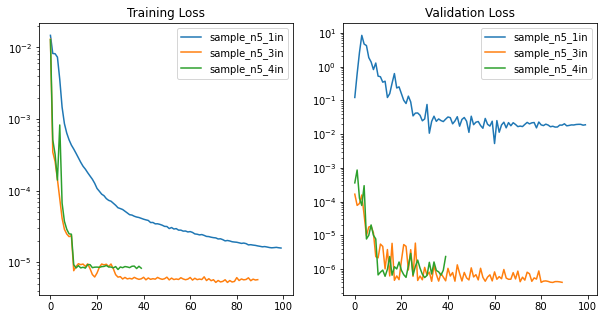

In [317]:
y_cols = {
          #'sample_n5_1ra' : 'RA_OF_ASC_NODE',
          #'sample_n5_1ap' : 'ARG_OF_PERICENTER',
          'sample_n5_1in' : 'INCLINATION',
          'sample_n5_3in' : 'INCLINATION',
          'sample_n5_4in' : 'INCLINATION',
          #'sample_n5_1mm' : 'MEAN_MOTION',
          #'sample_n5_1ec' : 'ECCENTRICITY',
          #'sample_n5_1ma' : 'MEAN_ANOMALY',
         }

single_column_results = {}

for i, (model_id, y_col) in enumerate(y_cols.items()):
    graph_cols = [y_col]
    
    y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
    y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])

    try:
        with open(f'data/{model_id}.cfg') as f:
            configurations = json.load(f)
            model, mean_losses = train.load_model_only(configurations)
            
            single_column_results[model_id] = (y_col, model, mean_losses)
    except:
        continue

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")

for i, (name, (y_col, _, mean_losses)) in enumerate(single_column_results.items()):
    tl, vl = zip(*mean_losses)
    ax1.plot(tl, label=name)
    ax2.plot(vl, label=name)
    
# ax1.set_ylim(0,0.05)
# ax2.set_ylim(0.0,0.05)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.legend()
ax2.legend()
plt.show()

In [281]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

X_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train_10839.pkl')
y_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train_10839.pkl')
X_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test_27944.pkl')
y_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test_27944.pkl')

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

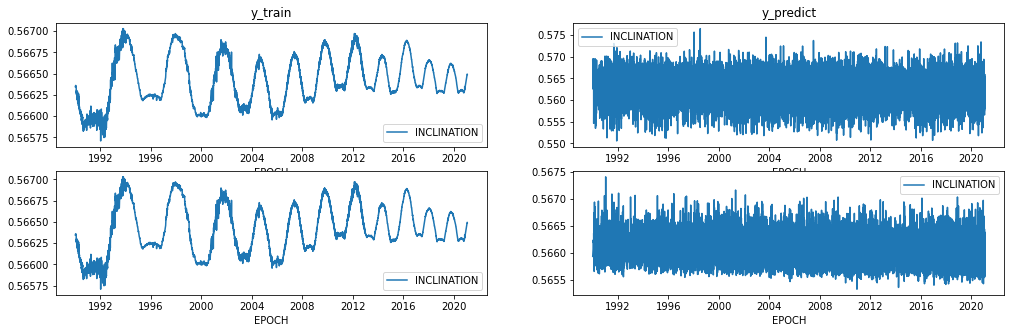

In [292]:
ycol_ra = ['RA_OF_ASC_NODE']
ycol_ap = ['ARG_OF_PERICENTER']
ycol_in = ['INCLINATION']
ycol_mm = ['MEAN_MOTION']
ycol_ec = ['ECCENTRICITY']
ycol_ma = ['MEAN_ANOMALY']

graph_cols = ycol_ra

gc= len(single_column_results)
fig, axs = plt.subplots(gc,2,figsize=(17,gc*2.5))

for i, (name, (y_col, model, _)) in enumerate(single_column_results.items()):
    graph_cols = [y_col]
    
    y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
    y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])
        
    results = train.predict(model, X_train_10839[cols], y_train_10839[graph_cols], device=configurations['device'])
    y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
    y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
    y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

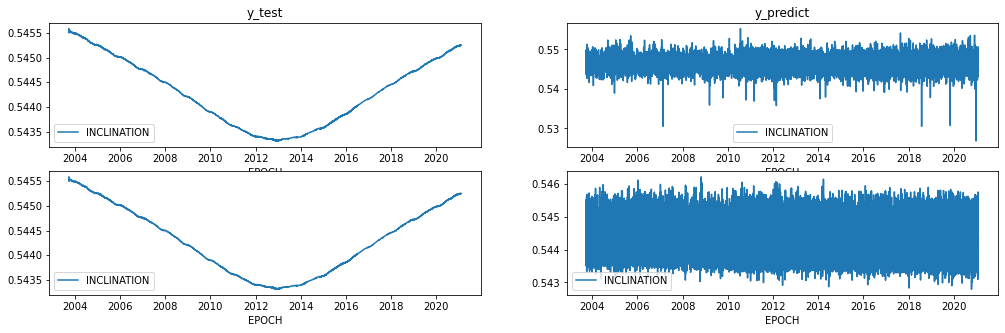

In [293]:
graph_cols = ycol_ra

gc= len(single_column_results)
fig, axs = plt.subplots(gc,2,figsize=(17,gc*2.5))

for i, (name, (y_col, model, _)) in enumerate(single_column_results.items()):
    graph_cols = [y_col]
    
    y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
    y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,0])
        
    results = train.predict(model, X_test_27944[cols], y_test_27944[graph_cols], device=configurations['device'])
    y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
    y_pred_10839['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
    y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[i,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()

ValueError: The number of passed axes must be 1, the same as the output plot

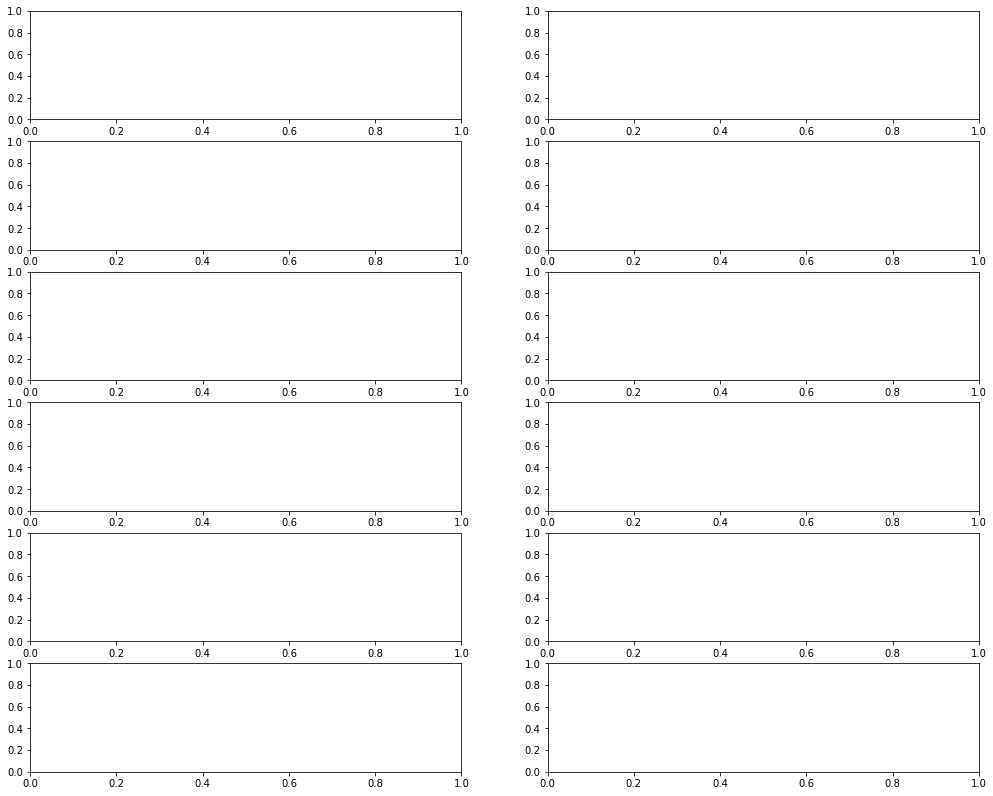

In [294]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

# y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944[y_train_10839.columns[:-1]], device=configurations['device'])
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()